In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import tensorflow as tf
import cv2
from google.cloud import storage
import io
from PIL import Image

import sys, os, inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(2,parentdir) 
from model.image_utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
path = '/home/ecbm4040/data/celebA'
images = load_images_from_local(path, True, 1000)

In [18]:
#check the number of images 
len(images)

1000

In [19]:
#show an example image matrix 
images[0]

array([[[ 0.56078431,  0.56078431,  0.54509804],
        [ 0.56862745,  0.56862745,  0.55294118],
        [ 0.55294118,  0.55294118,  0.5372549 ],
        ...,
        [ 0.58431373,  0.58431373,  0.56862745],
        [ 0.58431373,  0.58431373,  0.56862745],
        [ 0.58431373,  0.58431373,  0.56862745]],

       [[ 0.56078431,  0.56078431,  0.54509804],
        [ 0.56862745,  0.56862745,  0.55294118],
        [ 0.55294118,  0.55294118,  0.54509804],
        ...,
        [ 0.58431373,  0.58431373,  0.56862745],
        [ 0.58431373,  0.58431373,  0.56862745],
        [ 0.58431373,  0.58431373,  0.56862745]],

       [[ 0.56078431,  0.56078431,  0.54509804],
        [ 0.56078431,  0.56078431,  0.54509804],
        [ 0.56078431,  0.56078431,  0.54509804],
        ...,
        [ 0.59215686,  0.59215686,  0.57647059],
        [ 0.59215686,  0.59215686,  0.57647059],
        [ 0.59215686,  0.59215686,  0.57647059]],

       ...,

       [[ 0.88235294,  0.81960784,  0.73333333],
        [ 0

In [20]:
## Add noise
image_noise = add_noise(images, 1, 5)

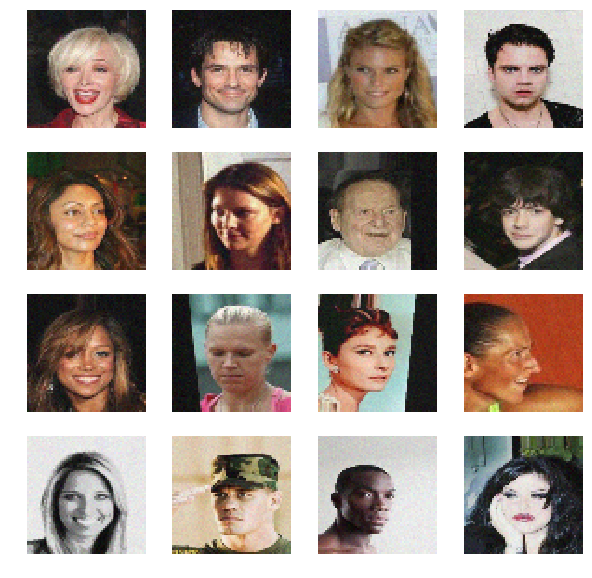

In [21]:
#visualize the preprocessed images

#convert the images back to 0-255 for visualization 
images2 = [cv2.normalize(i, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F).astype(np.uint8) 
           for i in image_noise]
img_col = ImageCollector(np.asarray(images2))
img_col.show(np.asarray(images2))

In [22]:
# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
% load_ext autoreload
% autoreload 2
#train the model - generator and discriminator 
from model.dcgan import DCGAN

tf.reset_default_graph()
dcgan = DCGAN(batch_size=64,
              z_dim=100,
              model_name='DCGAN',
              data_source='CelebA',
              z_dist='norm')
dcgan.train(image_noise, learning_rate=0.0001, iters=1500)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
conv_0_(64, 4, 4, 512)
conv_0_norm_(64, 4, 4, 512)
conv_0_relu_(64, 4, 4, 512)
conv_1_(64, 8, 8, 256)
conv_1_norm_(64, 8, 8, 256)
conv_1_relu_(64, 8, 8, 256)
conv_2_(64, 16, 16, 128)
conv_2_norm_(64, 16, 16, 128)
conv_2_relu_(64, 16, 16, 128)
conv_3_(64, 32, 32, 64)
conv_3_norm_(64, 32, 32, 64)
conv_3_relu_(64, 32, 32, 64)
conv_4_(64, 64, 64, 3)
(64, 64, 64, 3)
(64, 64, 64, 3)
Building my DCGAN
X_train size 1000
new size 1000
Step: 0, D_loss: 1.4859142303466797, G_loss: 0.42127561569213867
Step: 100, D_loss: 0.1843430995941162, G_loss: 4.816902160644531
Step: 200, D_loss: 0.1249348446726799, G_loss: 6.136018753051758
Step: 300, D_loss: 0.40269142389297485, G_loss: 3.2523763179779053
Step: 400, D_loss: 0.19907133281230927, G_loss: 5.44118595123291
Step: 500, D_loss: 0.20278489589691162, G_loss: 4.09688663482666
Step: 600, D_loss: 0.40857547521591187, G_loss: 6.211540699005127
Step: 700, D_loss: 0.200

In [24]:
# show the graph
from model.cnn_jupyter_tensorboard import show_graph 
tf.reset_default_graph()
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('../CelebA/checkpoints/DCGAN.ckpt.meta')
    graph = tf.get_default_graph()
    show_graph(graph)
    

In [25]:
tf.train.get_checkpoint_state('../CelebA/checkpoints')

model_checkpoint_path: "../CelebA/checkpoints/DCGAN.ckpt"
all_model_checkpoint_paths: "../CelebA/checkpoints/DCGAN.ckpt"

In [26]:
checkpoint = tf.train.latest_checkpoint('../CelebA/checkpoints')

In [27]:
#Step 1 
#import the model metagraph
saver = tf.train.import_meta_graph('../CelebA/checkpoints/DCGAN.ckpt.meta', clear_devices=True)
#make that as the default graph
graph = tf.get_default_graph()
input_graph_def = graph.as_graph_def()
sess = tf.Session()
#now restore the variables
saver.restore(sess, "../CelebA/checkpoints/DCGAN.ckpt")


INFO:tensorflow:Restoring parameters from ../CelebA/checkpoints/DCGAN.ckpt


In [29]:
#Step 2
# Find the output name
graph = tf.get_default_graph()
for n in graph.as_graph_def().node: 
      print (n.name)

save/RestoreV2/shape_and_slices
save/RestoreV2/tensor_names
save/SaveV2/shape_and_slices
save/SaveV2/tensor_names
save/Const
save/RestoreV2
train_step_1/d_adam/epsilon
train_step_1/d_adam/beta2
train_step_1/d_adam/beta1
train_step_1/d_adam/learning_rate
Discriminator/fc_layer_d/fc_bias/d_fc_bias_1/d_adam_1
save/Assign_29
Discriminator/fc_layer_d/fc_bias/d_fc_bias_1/d_adam_1/read
Discriminator/fc_layer_d/fc_bias/d_fc_bias_1/d_adam_1/Initializer/zeros
Discriminator/fc_layer_d/fc_bias/d_fc_bias_1/d_adam_1/Assign
Discriminator/fc_layer_d/fc_bias/d_fc_bias_1/d_adam
save/Assign_28
Discriminator/fc_layer_d/fc_bias/d_fc_bias_1/d_adam/read
Discriminator/fc_layer_d/fc_bias/d_fc_bias_1/d_adam/Initializer/zeros
Discriminator/fc_layer_d/fc_bias/d_fc_bias_1/d_adam/Assign
Discriminator/fc_layer_d/d_fc_kernel_1/d_adam_1
save/Assign_26
Discriminator/fc_layer_d/d_fc_kernel_1/d_adam_1/read
Discriminator/fc_layer_d/d_fc_kernel_1/d_adam_1/Initializer/zeros/Const
Discriminator/fc_layer_d/d_fc_kernel_1/d_ada

Discriminator/d_conv_layer_1/conv_bias/d_conv_bias_1/d_adam_1/Assign_1
Discriminator/d_conv_layer_1/conv_bias/d_conv_bias_1/d_adam_2
save/Assign_7_1
Discriminator/d_conv_layer_1/conv_bias/d_conv_bias_1/d_adam/read_1
Discriminator/d_conv_layer_1/conv_bias/d_conv_bias_1/d_adam/Initializer/zeros_1
Discriminator/d_conv_layer_1/conv_bias/d_conv_bias_1/d_adam/Assign_1
Discriminator/d_conv_layer_1/d_conv_kernel_1/d_adam_1_1
save/Assign_11_1
Discriminator/d_conv_layer_1/d_conv_kernel_1/d_adam_1/read_1
Discriminator/d_conv_layer_1/d_conv_kernel_1/d_adam_1/Initializer/zeros/Const_1
Discriminator/d_conv_layer_1/d_conv_kernel_1/d_adam_1/Initializer/zeros/shape_as_tensor_1
Discriminator/d_conv_layer_1/d_conv_kernel_1/d_adam_1/Initializer/zeros_1
Discriminator/d_conv_layer_1/d_conv_kernel_1/d_adam_1/Assign_1
Discriminator/d_conv_layer_1/d_conv_kernel_1/d_adam_2
save/Assign_10_1
Discriminator/d_conv_layer_1/d_conv_kernel_1/d_adam/read_1
Discriminator/d_conv_layer_1/d_conv_kernel_1/d_adam/Initializer/

train_step_1/gradients/Discriminator/LeakyRelu_2/Maximum_grad/tuple/group_deps_1
train_step_1/gradients/Discriminator/LeakyRelu_2/Maximum_grad/tuple/control_dependency_1_1
train_step_1/gradients/Discriminator/LeakyRelu_2/Maximum_grad/tuple/control_dependency_2
train_step_1/gradients/Discriminator/LeakyRelu_2/mul_grad/Mul_1_1
train_step_1/gradients/Discriminator/LeakyRelu_2/mul_grad/Sum_1_1
train_step_1/gradients/Discriminator/LeakyRelu_2/mul_grad/Reshape_1_1
train_step_1/gradients/Discriminator/LeakyRelu_2/mul_grad/Mul_2
train_step_1/gradients/Discriminator/LeakyRelu_2/mul_grad/Sum_2
train_step_1/gradients/Discriminator/LeakyRelu_2/mul_grad/Reshape_2
train_step_1/gradients/Discriminator/LeakyRelu_2/mul_grad/tuple/group_deps_1
train_step_1/gradients/Discriminator/LeakyRelu_2/mul_grad/tuple/control_dependency_1_1
train_step_1/gradients/AddN_8_1
train_step_1/gradients/Discriminator/d_conv_layer_2/Relu_grad/ReluGrad_1
train_step_1/gradients/Discriminator/d_conv_layer_2/add_grad/Sum_1_1
tra

In [30]:
#Step 3
from tensorflow.python.platform import gfile
from tensorflow.python.framework import graph_util

output_node_names=[v.op.name for v in tf.global_variables()] 

output_graph_def = graph_util.convert_variables_to_constants(
        sess, # The session
        input_graph_def, # input_graph_def is useful for retrieving the nodes 
        output_node_names)    



INFO:tensorflow:Froze 72 variables.
Converted 72 variables to const ops.


In [31]:
output_node_names

['Generator/fc_layer_g/g_fc_kernel_0',
 'Generator/fc_layer_g/fc_bias/g_fc_bias_0',
 'Generator/batch_norm/Generator/batch_norm/moments/mean/ExponentialMovingAverage',
 'Generator/batch_norm/Generator/batch_norm/moments/variance/ExponentialMovingAverage',
 'Generator/g_conv_transpose_layer_1/g_conv_transpose_kernel_1',
 'Generator/g_conv_transpose_layer_1/conv_bias/g_conv_transpose_bias_1',
 'Generator/batch_norm/Generator/batch_norm_1/moments/mean/ExponentialMovingAverage',
 'Generator/batch_norm/Generator/batch_norm_1/moments/variance/ExponentialMovingAverage',
 'Generator/g_conv_transpose_layer_2/g_conv_transpose_kernel_2',
 'Generator/g_conv_transpose_layer_2/conv_bias/g_conv_transpose_bias_2',
 'Generator/batch_norm/Generator/batch_norm_2/moments/mean/ExponentialMovingAverage',
 'Generator/batch_norm/Generator/batch_norm_2/moments/variance/ExponentialMovingAverage',
 'Generator/g_conv_transpose_layer_3/g_conv_transpose_kernel_3',
 'Generator/g_conv_transpose_layer_3/conv_bias/g_co

In [32]:
#Step 4
#output folder
output_fld ='./'
#output pb file name
output_model_file = 'model.pb'
from tensorflow.python.framework import graph_io
#write the graph
graph_io.write_graph(output_graph_def, output_fld, output_model_file, as_text=False)

'./model.pb'

In [39]:
graph, graph_def = loadpb('./model.pb',model_name='DCGAN' )

In [43]:
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('../CelebA/checkpoints/DCGAN.ckpt.meta')
    loader.restore(sess, '../CelebA/checkpoints/DCGAN.ckpt')
    graph2 = tf.get_default_graph()
    for op in graph2.get_operations():
        print(op.name)
    #input_= graph.get_tensor_by_name('Placeholder:0')

INFO:tensorflow:Restoring parameters from ../CelebA/checkpoints/DCGAN.ckpt
save/RestoreV2/shape_and_slices
save/RestoreV2/tensor_names
save/SaveV2/shape_and_slices
save/SaveV2/tensor_names
save/Const
save/RestoreV2
train_step_1/d_adam/epsilon
train_step_1/d_adam/beta2
train_step_1/d_adam/beta1
train_step_1/d_adam/learning_rate
Discriminator/fc_layer_d/fc_bias/d_fc_bias_1/d_adam_1
save/Assign_29
Discriminator/fc_layer_d/fc_bias/d_fc_bias_1/d_adam_1/read
Discriminator/fc_layer_d/fc_bias/d_fc_bias_1/d_adam_1/Initializer/zeros
Discriminator/fc_layer_d/fc_bias/d_fc_bias_1/d_adam_1/Assign
Discriminator/fc_layer_d/fc_bias/d_fc_bias_1/d_adam
save/Assign_28
Discriminator/fc_layer_d/fc_bias/d_fc_bias_1/d_adam/read
Discriminator/fc_layer_d/fc_bias/d_fc_bias_1/d_adam/Initializer/zeros
Discriminator/fc_layer_d/fc_bias/d_fc_bias_1/d_adam/Assign
Discriminator/fc_layer_d/d_fc_kernel_1/d_adam_1
save/Assign_26
Discriminator/fc_layer_d/d_fc_kernel_1/d_adam_1/read
Discriminator/fc_layer_d/d_fc_kernel_1/d_

train_step/gradients/Generator/batch_norm_3/batchnorm/mul_grad/Sum
train_step/gradients/Generator/batch_norm_3/batchnorm/mul_grad/Reshape
train_step/gradients/Generator/batch_norm_3/batchnorm/mul_grad/tuple/group_deps
train_step/gradients/Generator/batch_norm_3/batchnorm/mul_grad/tuple/control_dependency_1
train_step/gradients/AddN_5
train_step/gradients/Generator/batch_norm_3/batchnorm/Rsqrt_grad/RsqrtGrad
train_step/gradients/Generator/batch_norm_3/batchnorm/add_grad/Sum_1
train_step/gradients/Generator/batch_norm_3/batchnorm/add_grad/Reshape_1
train_step/gradients/Generator/batch_norm_3/batchnorm/add_grad/Sum
train_step/gradients/Generator/batch_norm_3/batchnorm/add_grad/Reshape
train_step/gradients/Generator/batch_norm_3/batchnorm/add_grad/tuple/group_deps
train_step/gradients/Generator/batch_norm_3/batchnorm/add_grad/tuple/control_dependency_1
train_step/gradients/Generator/batch_norm_3/batchnorm/add_grad/tuple/control_dependency
train_step/gradients/Generator/batch_norm_3/cond/Me

train_step/gradients/Generator/g_conv_transpose_layer_2/conv2d_transpose_grad/Shape_1
train_step/gradients/Generator/batch_norm_2/moments/mean_grad/Const_1
train_step/gradients/Generator/batch_norm_2/moments/mean_grad/Maximum/y_1
train_step/gradients/Generator/batch_norm_2/moments/mean_grad/Fill/value_1
train_step/gradients/Generator/batch_norm_2/moments/mean_grad/range/delta_1
train_step/gradients/Generator/batch_norm_2/moments/mean_grad/range/start_1
train_step/gradients/Generator/batch_norm_2/moments/mean_grad/Shape_1_1
train_step/gradients/Generator/batch_norm_2/moments/mean_grad/Fill_1
train_step/gradients/Generator/batch_norm_2/moments/mean_grad/Size_1
train_step/gradients/Generator/batch_norm_2/moments/mean_grad/range_1
train_step/gradients/Generator/batch_norm_2/moments/mean_grad/Shape_2
train_step/gradients/Generator/batch_norm_2/moments/SquaredDifference_grad/Shape_1_1
train_step/gradients/Generator/batch_norm_2/moments/SquaredDifference_grad/Shape_2
train_step/gradients/Gene

train_step_1/gradients/Discriminator_1/d_conv_layer_0/Conv2D_grad/tuple/group_deps_1
train_step_1/gradients/Discriminator_1/d_conv_layer_0/Conv2D_grad/tuple/control_dependency_1_1
train_step_1/gradients/Discriminator_1/d_conv_layer_0/Conv2D_grad/tuple/control_dependency_2
train_step_1/gradients/Discriminator_1/LeakyRelu/mul_grad/tuple/control_dependency_2
train_step_1/gradients/Discriminator_1/LeakyRelu_1/mul_grad/tuple/control_dependency_2
train_step_1/gradients/Discriminator_1/LeakyRelu_2/mul_grad/tuple/control_dependency_2
train_step_1/gradients/Discriminator_1/LeakyRelu_3/mul_grad/tuple/control_dependency_2
logistic_loss_1/Log1p_1
logistic_loss_1/Select_2
logistic_loss_1/sub_1
logistic_loss_1_1
discriminator_loss_fake_images_1
Discriminator_1/sigmoid_real_1
inputs/real_1
train_step_1/gradients/Discriminator/d_conv_layer_0/Conv2D_grad/ShapeN_1
Discriminator/d_conv_layer_0/Conv2D_1
Discriminator/d_conv_layer_0/add_1
Discriminator/d_conv_layer_0/Relu_1
Discriminator/LeakyRelu/mul_1
tr

Generator/batch_norm/Generator/batch_norm_1/moments/mean/ExponentialMovingAverage/read_2
Generator/batch_norm/Generator/batch_norm_1/moments/mean/ExponentialMovingAverage/Initializer/zeros/Const_2
Generator/batch_norm/Generator/batch_norm_1/moments/mean/ExponentialMovingAverage/Initializer/zeros/shape_as_tensor_2
Generator/batch_norm/Generator/batch_norm_1/moments/mean/ExponentialMovingAverage/Initializer/zeros_2
Generator/batch_norm/Generator/batch_norm_1/moments/mean/ExponentialMovingAverage/Assign_2
Generator/batch_norm_1/moments/variance/reduction_indices_2
train_step/gradients/Generator/batch_norm_1/moments/variance_grad/add_2
train_step/gradients/Generator/batch_norm_1/moments/variance_grad/mod_2
train_step/gradients/Generator/batch_norm_1/moments/variance_grad/DynamicStitch_2
train_step/gradients/Generator/batch_norm_1/moments/variance_grad/Maximum_2
train_step/gradients/Generator/batch_norm_1/moments/variance_grad/floordiv_2
Generator/batch_norm_1/moments/mean/reduction_indices

train_step/g_adam/update_Generator/g_conv_transpose_layer_2/conv_bias/g_conv_transpose_bias_2/ApplyAdam_2
train_step/gradients/Generator/g_conv_transpose_layer_2/BiasAdd_grad/tuple/control_dependency_3
train_step/gradients/Generator/g_conv_transpose_layer_2/conv2d_transpose_grad/Conv2D_2
train_step/gradients/Generator/g_conv_transpose_layer_2/conv2d_transpose_grad/Conv2DBackpropFilter_2
train_step/gradients/Generator/g_conv_transpose_layer_2/conv2d_transpose_grad/tuple/group_deps_2
train_step/gradients/Generator/g_conv_transpose_layer_2/conv2d_transpose_grad/tuple/control_dependency_1_2
train_step/gradients/Generator/Relu_1_grad/ReluGrad_2
train_step/gradients/Generator/batch_norm_1/batchnorm/add_1_grad/Sum_1_2
train_step/gradients/Generator/batch_norm_1/batchnorm/add_1_grad/Reshape_1_2
train_step/gradients/Generator/batch_norm_1/batchnorm/add_1_grad/Sum_3
train_step/gradients/Generator/batch_norm_1/batchnorm/add_1_grad/Reshape_3
train_step/gradients/Generator/batch_norm_1/batchnorm/ad

In [45]:
graph2.get_tensor_by_name('inputs/z:0')

<tf.Tensor 'inputs/z:0' shape=(64, 100) dtype=float32>